<a href="https://colab.research.google.com/github/marialuisamartins/PosGrad_Data_Analytics_FIAP/blob/main/AnaliseExploratoriaDeDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fase 1: Data Analysis and Exploration

## Análise Exploratória de Dados

### Aula 1 - Aquisição e leitura de dados reais (Produção Hospitalar)

In [88]:
"""
De onde vem os dados:
Site DataSUS > TabNet > Assistência à Saúde > Produção Hospitalar (SIH/SUS) >
Dados Consolidados AIH (RD), por local de internação, a partir de 2008 >
Abrangência Geográfica: Brasil por Região e Unidade de Federação

*IH - Internação Hospitalar

Seleção:
Linha - Unidade da Federação
Coluna - Ano/mês atendimento e de processamento (serão geradas essas duas tabelas)
Conteúdo - Valor total
Períodos disponíveis - Janeiro de 2008 a Setembro de 2021 (data do vídeo da aula)

COPIA COMO .CSV - Faz o download (fazer para as duas abas)

"""

'\nDe onde vem os dados:\nSite DataSUS > TabNet > Assistência à Saúde > Produção Hospitalar (SIH/SUS) >\nDados Consolidados AIH (RD), por local de internação, a partir de 2008 >\nAbrangência Geográfica: Brasil por Região e Unidade de Federação\n\n*IH - Internação Hospitalar\n\nSeleção:\nLinha - Unidade da Federação\nColuna - Ano/mês atendimento e de processamento (serão geradas essas duas tabelas)\nConteúdo - Valor total\nPeríodos disponíveis - Janeiro de 2008 a Setembro de 2021 (data do vídeo da aula)\n\nCOPIA COMO .CSV - Faz o download (fazer para as duas abas)\n\n'

In [89]:
# A tabela de atendimento começa com dados de 1992 a de processamento começa de 2008, por que?

In [90]:
import pandas as pd

In [91]:
dados = pd.read_csv('/content/Processamento_Hospitalar.csv', encoding="ISO-8859=1", skiprows=3, sep=";", skipfooter=12, thousands=".", decimal=",")

# Essa variável dados é um DataFrame

# skip rows pra pular as primeiras 3 linhas de cabeçalho
# sep para considerar ponto e vírgula o separador
# skip footer para apagar as linhas "inúteis" no fim do arquivo, sem o total inclusive
# thousands para indicar a separação dos milhares com ponto e não vírgula
# decimal para separar decimais por vírgula

# Documentação para ajudar: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html



<ipython-input-91-c6e4f0dd0c27>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  dados = pd.read_csv('/content/Processamento_Hospitalar.csv', encoding="ISO-8859=1", skiprows=3, sep=";", skipfooter=12, thousands=".", decimal=",")


In [92]:
dados.head()

# traz as 5 primeiras linhas

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2023/Mai,2023/Jun,2023/Jul,2023/Ago,2023/Set,2023/Out,2023/Nov,2023/Dez,2024/Jan,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,...,13767058.64,11273846.83,12443977.87,13054654.77,11274549.92,12082214.04,11392759.99,9603361.10,10516070.26,1394262146.50
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,...,4845006.75,5124899.00,5692793.93,4561281.78,4019181.11,4150926.64,5712687.05,3503827.09,-,587778407.94
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,...,21710028.09,22198453.04,24809424.63,25005960.66,17522338.72,19613290.58,18387673.59,14265257.60,15065867.12,2613559191.21
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,...,4435042.77,3817361.58,4040988.99,4766375.31,1679849.33,2443674.72,2868626.39,2077360.03,2164371.02,451170144.15
4,15 Pará,18864744.11,19553758.20,21937342.70,20842829.69,23249952.88,23240687.56,24002223.56,23341218.03,25172261.32,...,46925899.02,45938305.83,54094884.03,50116544.12,51268388.79,50646320.52,55501176.43,54223823.56,43689467.84,6322687933.44


In [93]:
dados.tail()

# traz as 5 últimas linhas

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2023/Mai,2023/Jun,2023/Jul,2023/Ago,2023/Set,2023/Out,2023/Nov,2023/Dez,2024/Jan,Total
22,43 Rio Grande do Sul,30931325.46,57363420.01,51547794.07,56673338.49,48397733.07,52413429.62,56636376.98,56113054.70,55356224.30,...,112385822.04,113809028.30,116985178.63,120027121.08,116546657.80,122325557.64,114892531.95,114464874.02,120732038.67,16750147966.65
23,50 Mato Grosso do Sul,5377392.11,7002472.61,8423933.19,8797487.68,9770421.80,10905392.18,10249299.82,9671553.45,10218511.05,...,26973943.11,26354221.47,26569066.08,27768462.56,28200723.03,26783833.64,27456434.20,26922668.28,23959476.62,3219624366.70
24,51 Mato Grosso,4795299.01,8684882.23,7886243.14,8794109.79,9231645.40,10221763.77,9163314.28,9243148.81,9052354.89,...,23431985.13,24728541.29,24130933.81,22608901.38,23329871.28,22552033.63,22790096.76,19782985.94,21462469.97,2988456549.66
25,52 Goiás,15310637.29,22258668.68,21442515.75,20921212.45,21615970.67,18270043.87,20540517.13,20650730.67,20868443.56,...,50235627.95,44674462.22,53622374.91,51008354.28,49885683.22,50434366.44,47764974.85,50332961.30,47555420.60,6682627768.18
26,53 Distrito Federal,4745919.19,7632480.67,9647203.26,11098732.99,12891719.72,12850125.67,12565646.74,13710857.89,13165106.20,...,27495227.73,28258576.00,29034177.33,30961244.28,31610313.47,29140330.80,30810835.09,29465293.81,31878001.55,3543027009.96


In [94]:
# médias por mês
dados.mean()

<ipython-input-94-9281e9742e59>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dados.mean()


2008/Jan     15126846.64
2008/Fev     22710158.12
2008/Mar     24594187.35
2008/Abr     25431957.83
2008/Mai     26511245.91
                ...     
2023/Set     65189094.24
2023/Out     66941705.27
2023/Nov     65725826.24
2023/Dez     65537138.18
Total      8578342381.93
Length: 192, dtype: float64

In [95]:
# visão geral do dataframe
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 195 entries, Unidade da Federação to Total
dtypes: float64(192), object(3)
memory usage: 41.3+ KB


In [96]:
# para impedir a saída que está em notação científica (ex.: +07)
pd.options.display.float_format = "{:.2f}".format

In [97]:
# novos valores de média pós formatação
dados.mean()

<ipython-input-97-235e14dd1d0c>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dados.mean()


2008/Jan     15126846.64
2008/Fev     22710158.12
2008/Mar     24594187.35
2008/Abr     25431957.83
2008/Mai     26511245.91
                ...     
2023/Set     65189094.24
2023/Out     66941705.27
2023/Nov     65725826.24
2023/Dez     65537138.18
Total      8578342381.93
Length: 192, dtype: float64

In [100]:
# Desafio - mostrar a coluna mais recente de todas, independente de qual ela for
dados['2023/Dez']

# Isso resulta numa série de valores
# tentei fazer com janeiro de 2024, mas tinha um valor nulo então não dava pra trabalhar com ela

0      9603361.10
1      3503827.09
2     14265257.60
3      2077360.03
4     54223823.56
5      4021077.83
6     10074562.93
7     40847676.30
8     21650742.95
9     63542964.03
10    29155981.54
11    35767071.98
12    85366310.97
13    20482951.60
14    15601529.83
15    94377498.92
16   219072249.00
17    41166956.08
18   132738171.12
19   383374712.92
20   155479759.04
21    92140100.99
22   114464874.02
23    26922668.28
24    19782985.94
25    50332961.30
26    29465293.81
Name: 2023/Dez, dtype: float64

In [102]:
# Uma forma de trabalhar com a série gerada - média de valor por estado
dados['2023/Jan'].mean()

59734715.98814815

In [103]:
# Bônus
# Se eu quisesse mais de uma coluna
dados.loc[:,['2023/Dez', '2024/Jan']]

,2023/Dez,2024/Jan
0,9603361.10,10516070.26
1,3503827.09,-
2,14265257.60,15065867.12
3,2077360.03,2164371.02
4,54223823.56,43689467.84
5,4021077.83,3961035.17
6,10074562.93,426805.38
7,40847676.30,37885708.46
8,21650742.95,20541206.34
9,63542964.03,61814810.50


In [104]:
# Se eu quisesse só algumas linhas dessas colunas (ex.: linhas 0 a 3)
dados.loc[0:3,['2023/Dez', '2024/Jan']]

,2023/Dez,2024/Jan
0,9603361.10,10516070.26
1,3503827.09,-
2,14265257.60,15065867.12
3,2077360.03,2164371.02


### Aula 2 - Primeiras Visualizações de Dados

<Axes: xlabel='Unidade da Federação'>

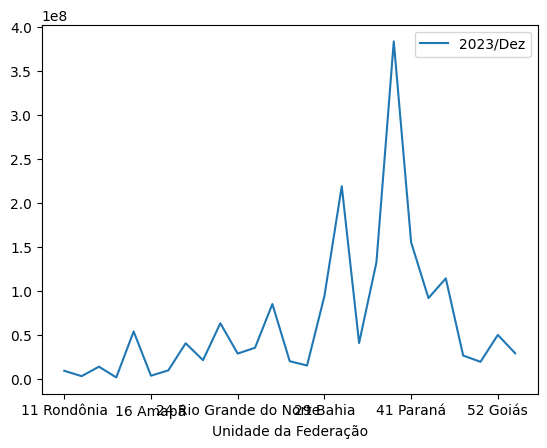

In [106]:
# o pandas tem imbutida a biblioteca matplotlib, que usaremos a seguir

dados.plot(x="Unidade da Federação", y="2023/Dez")

# gera um gráfico de linha, mas não existem valores entre os dois pontos, que são os estados, não faz sentido

Text(0.5, 1.0, 'Valor por unidade da federação')

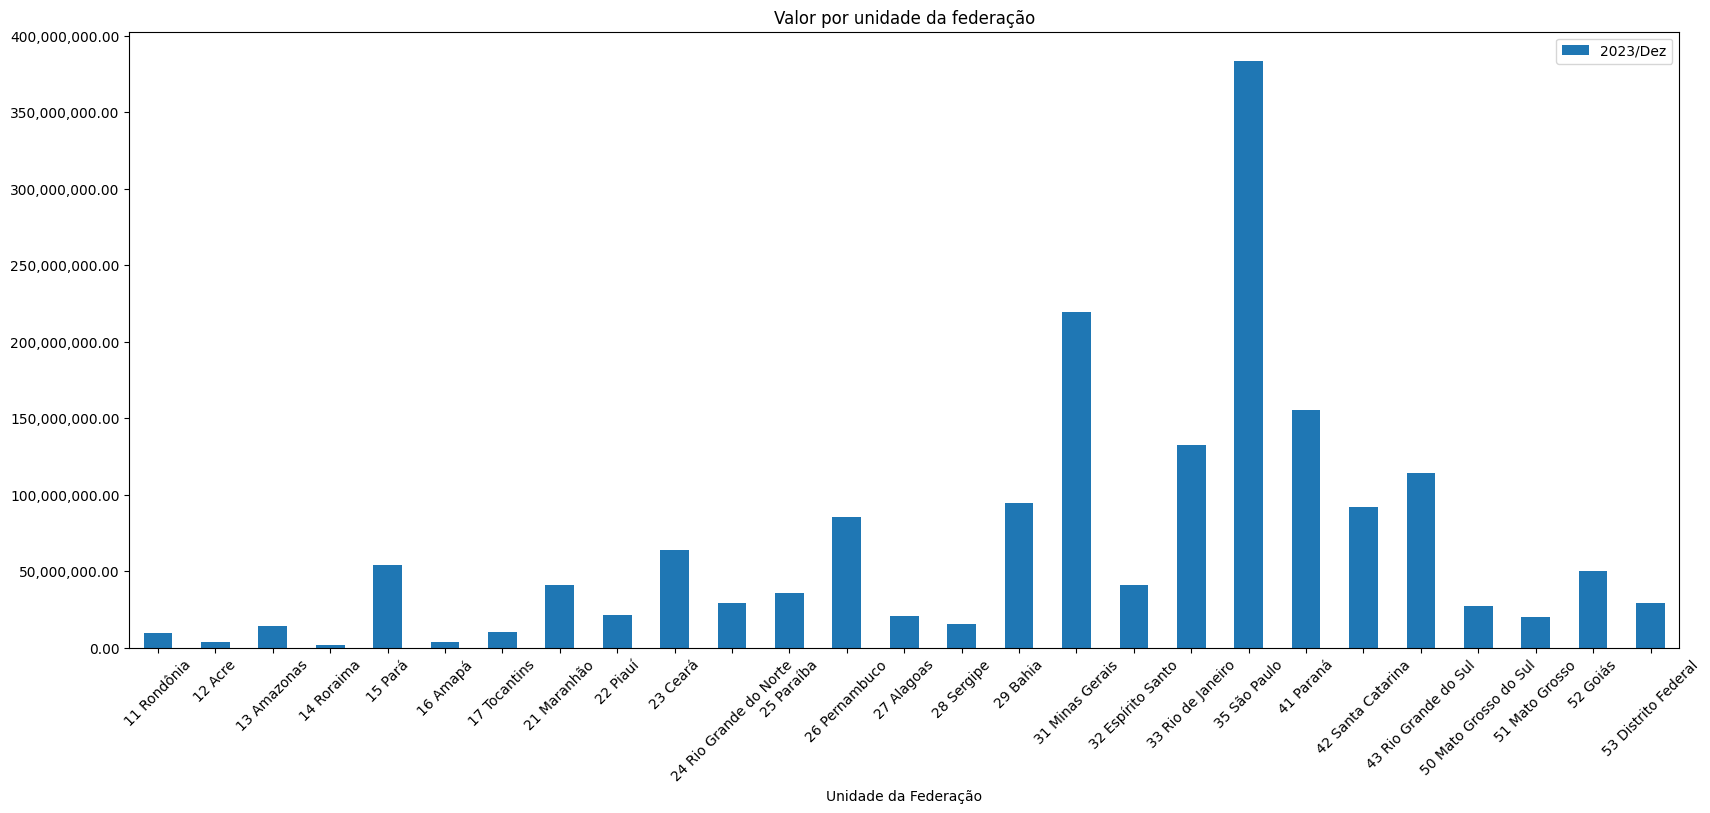

In [124]:
# Estilizando o gráfico

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

axis = dados.plot(x="Unidade da Federação", y="2023/Dez", kind="bar", figsize=(20,8))

# Desafio - colocar os nomes dos estados em 45º para melhor leitura
axis.xaxis.set_tick_params(rotation=45)
# fonte: https://matplotlib.org/stable/gallery/ticks/date_demo_rrule.html#sphx-glr-gallery-ticks-date-demo-rrule-py

axis.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.title("Valor por unidade da federação")